In [5]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
# import the titanic dataset
titanic = pd.read_csv('titanic.csv')

# check the first 5 rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# check the last 5 rows of the dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
# check the number of rows and columns in the dataset
titanic.shape

(418, 12)

In [10]:
# check the column names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# check the data types of the columns
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# check the information of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [13]:
# check the number of missing values in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
# check the number of unique values in each column
titanic.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [15]:
# check the number of passengers who survived and who did not survive
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [16]:
# check the number of passengers who survived and who did not survive in percentage
titanic['Survived'].value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Survived, dtype: float64

<Axes: >

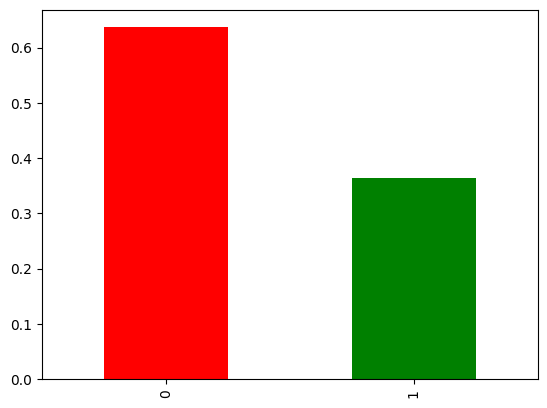

In [17]:
# check the number of passengers who survived and who did not survive in percentage
titanic['Survived'].value_counts(normalize=True).plot(kind='bar', color=['red', 'green'])

<Axes: ylabel='Pclass'>

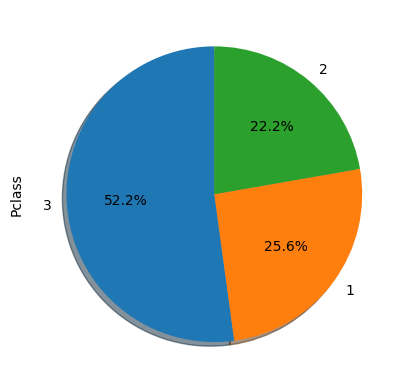

In [18]:
# plot a pie chart to check the number of passengers in each class
titanic['Pclass'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)

/tmp/ipykernel_21300/276265048.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')


<Axes: >

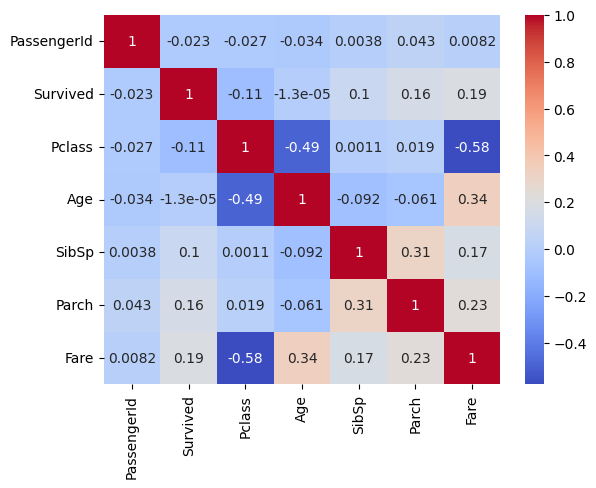

In [19]:
# plot a correlation matrix
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')

In [20]:
# replace the missing values in the Age column with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [21]:
# drop missing values in the fare column
titanic.dropna(subset=['Fare'], inplace=True)

In [22]:
# replace the missing values in the Embarked column with the most frequent value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [23]:
# one-hot encode the Embarked column
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

In [24]:
# cabin has a lot of missing values, so we will drop it
titanic.drop('Cabin', axis=1, inplace=True)

In [26]:
# drop the Name, Ticket, and PassengerId columns
titanic.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [30]:
# convert the gender column to numeric
# Map "male" to 0 and "female" to 1
titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})

In [32]:
# create a machine learning model to predict the survival of a passenger
# import the train_test_split function
from sklearn.model_selection import train_test_split

# import the random forest classifier
from sklearn.ensemble import RandomForestClassifier

# import the accuracy score
from sklearn.metrics import accuracy_score

# create the feature matrix (X) and target vector (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the random forest classifier
rf = RandomForestClassifier()

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test)

# check the accuracy score
print(accuracy_score(y_test, y_pred))


1.0


In [34]:
# import the joblib library
import joblib

# save the model to disk
joblib.dump(rf, 'model.pkl')

# load the model from disk
model = joblib.load('model.pkl')



In [33]:
# export the model to a pickle file
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))
